In [10]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r'E:\programming\dataset\Into_to_statstical_learning\Auto.csv')
print(data.shape)
data.head()

(397, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

In [4]:
data['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [5]:
data['horsepower'] = data['horsepower'].replace('?',np.nan)

In [6]:
data = data.dropna()

In [7]:
data['horsepower'] = data['horsepower'].astype('int')

In [8]:
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower        int32
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

In [9]:
powers = np.arange(1,11)

In [60]:
errors = []
for power in powers:
    poly = PolynomialFeatures(power)
    X = poly.fit_transform(data['horsepower'].to_frame())
    y = data['mpg']
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1,random_state = 0)

    lr = LinearRegression()
    lr.fit(X_train,y_train)
    errors.append(mean_squared_error(y_test,lr.predict(X_test)))

C:\Users\Lenovo\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1, 'LOOCV')

<Figure size 864x432 with 0 Axes>

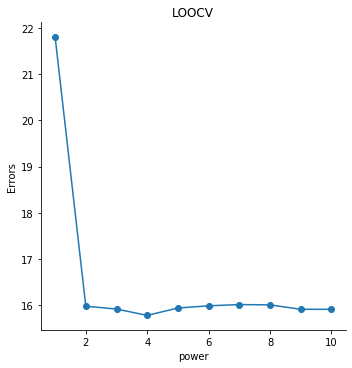

In [61]:
temp = pd.DataFrame({"power":powers,'Errors':errors})
plt.figure(figsize = (12,6))
g = sns.FacetGrid(data = temp,size=5)
g.map(plt.scatter, 'power' , 'Errors')
g.map(plt.plot, 'power', 'Errors')
plt.title('LOOCV')

In [80]:
errors_list = []
from sklearn.utils import shuffle
for i in range(10):
    errors = []
    n = len(data)
    for power in powers:
        poly = PolynomialFeatures(power)
        X = poly.fit_transform(data['horsepower'].to_frame())
        y = data['mpg']
        X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1,random_state = i)

        lr = LinearRegression()
        lr.fit(X_train,y_train)
        errors.append(mean_squared_error(y_test,lr.predict(X_test)))
    errors_list.append(errors)  

In [81]:
powers = np.arange(1,11)

In [82]:
data_dict = {'Errors'+ str(i):errors_list[i] for i in range(10)}
temp = pd.DataFrame(data_dict)
temp.index = powers

In [83]:
temp.head()

,Errors0,Errors1,Errors2,Errors3,Errors4,Errors5,Errors6,Errors7,Errors8,Errors9
1,21.811143,25.650160,28.827536,24.301369,19.272390,27.642677,23.776677,19.308620,21.060574,19.866369
2,15.977120,17.264520,23.742558,16.833850,13.476055,24.596552,17.410193,16.455937,12.453263,15.961779
3,15.915739,17.108497,23.604935,16.904634,13.398018,24.738484,17.722400,17.946887,12.251760,15.760263
4,15.778294,16.927266,24.277251,17.061203,13.286756,24.676498,18.807723,17.703585,12.478693,16.198389
5,15.938348,16.824453,25.036717,16.354698,12.552333,24.498935,16.656960,15.593667,12.468997,15.313392


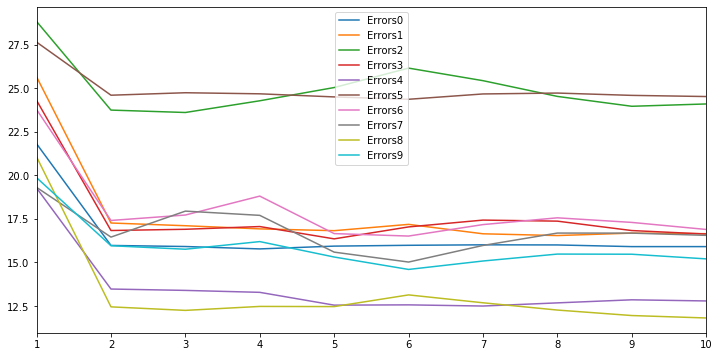

In [85]:
temp.plot.line(figsize = (12,6))